In [1]:
%matplotlib inline

from scipy. stats import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
from math import log
import seaborn as sns
from sklearn.model_selection import train_test_split

plt.style.use('seaborn-whitegrid')

In [2]:
data = pd.read_csv('./usd_to_rub.csv', sep=',')

In [3]:
data.head()

Date       Open       High        Low      Close  Adj Close  Volume
0  2011-09-02  28.937201  29.167999  28.909201  28.941601  28.941601     0.0
1  2011-09-05  29.142300  29.532499  29.126499  29.142300  29.142300     0.0
2  2011-09-06  29.458200  29.677000  29.382099  29.463900  29.463900     0.0
3  2011-09-07  29.579700  29.580099  29.430901  29.579700  29.579700     0.0
4  2011-09-08  29.399401  29.628000  29.389099  29.399401  29.399401     0.0

In [4]:
data = data.drop('Volume', axis = 1)

In [5]:
data.head()

Date       Open       High        Low      Close  Adj Close
0  2011-09-02  28.937201  29.167999  28.909201  28.941601  28.941601
1  2011-09-05  29.142300  29.532499  29.126499  29.142300  29.142300
2  2011-09-06  29.458200  29.677000  29.382099  29.463900  29.463900
3  2011-09-07  29.579700  29.580099  29.430901  29.579700  29.579700
4  2011-09-08  29.399401  29.628000  29.389099  29.399401  29.399401

In [6]:
data.isna().mean()

Date         0.000000
Open         0.001393
High         0.001393
Low          0.001393
Close        0.001393
Adj Close    0.001393
dtype: float64

In [7]:
data['Open'].value_counts()

64.372002    3
63.465000    3
72.730003    3
57.965000    3
61.465000    3
            ..
50.759998    1
49.985001    1
49.753700    1
49.959999    1
60.249599    1
Name: Open, Length: 2808, dtype: int64

In [8]:
data.shape

(2871, 6)

In [9]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2871 entries, 0 to 2870
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2871 non-null   object 
 1   Open       2867 non-null   float64
 2   High       2867 non-null   float64
 3   Low        2867 non-null   float64
 4   Close      2867 non-null   float64
 5   Adj Close  2867 non-null   float64
dtypes: float64(5), object(1)
memory usage: 134.7+ KB


In [10]:
data['Date'] = data['Date'].apply(lambda dt: pd.to_datetime(dt))
data.loc[:, 'year'] = data['Date'].apply(lambda dt: dt.year)
data['Date']

0      2011-09-02
1      2011-09-05
2      2011-09-06
3      2011-09-07
4      2011-09-08
          ...    
2866   2022-08-29
2867   2022-08-30
2868   2022-08-31
2869   2022-09-01
2870   2022-09-02
Name: Date, Length: 2871, dtype: datetime64[ns]

In [11]:
data.corr()

Open      High       Low     Close  Adj Close      year
Open       1.000000  0.998174  0.998111  0.991910   0.991910  0.851900
High       0.998174  1.000000  0.995868  0.990327   0.990327  0.846666
Low        0.998111  0.995868  1.000000  0.990079   0.990079  0.855170
Close      0.991910  0.990327  0.990079  1.000000   1.000000  0.850494
Adj Close  0.991910  0.990327  0.990079  1.000000   1.000000  0.850494
year       0.851900  0.846666  0.855170  0.850494   0.850494  1.000000

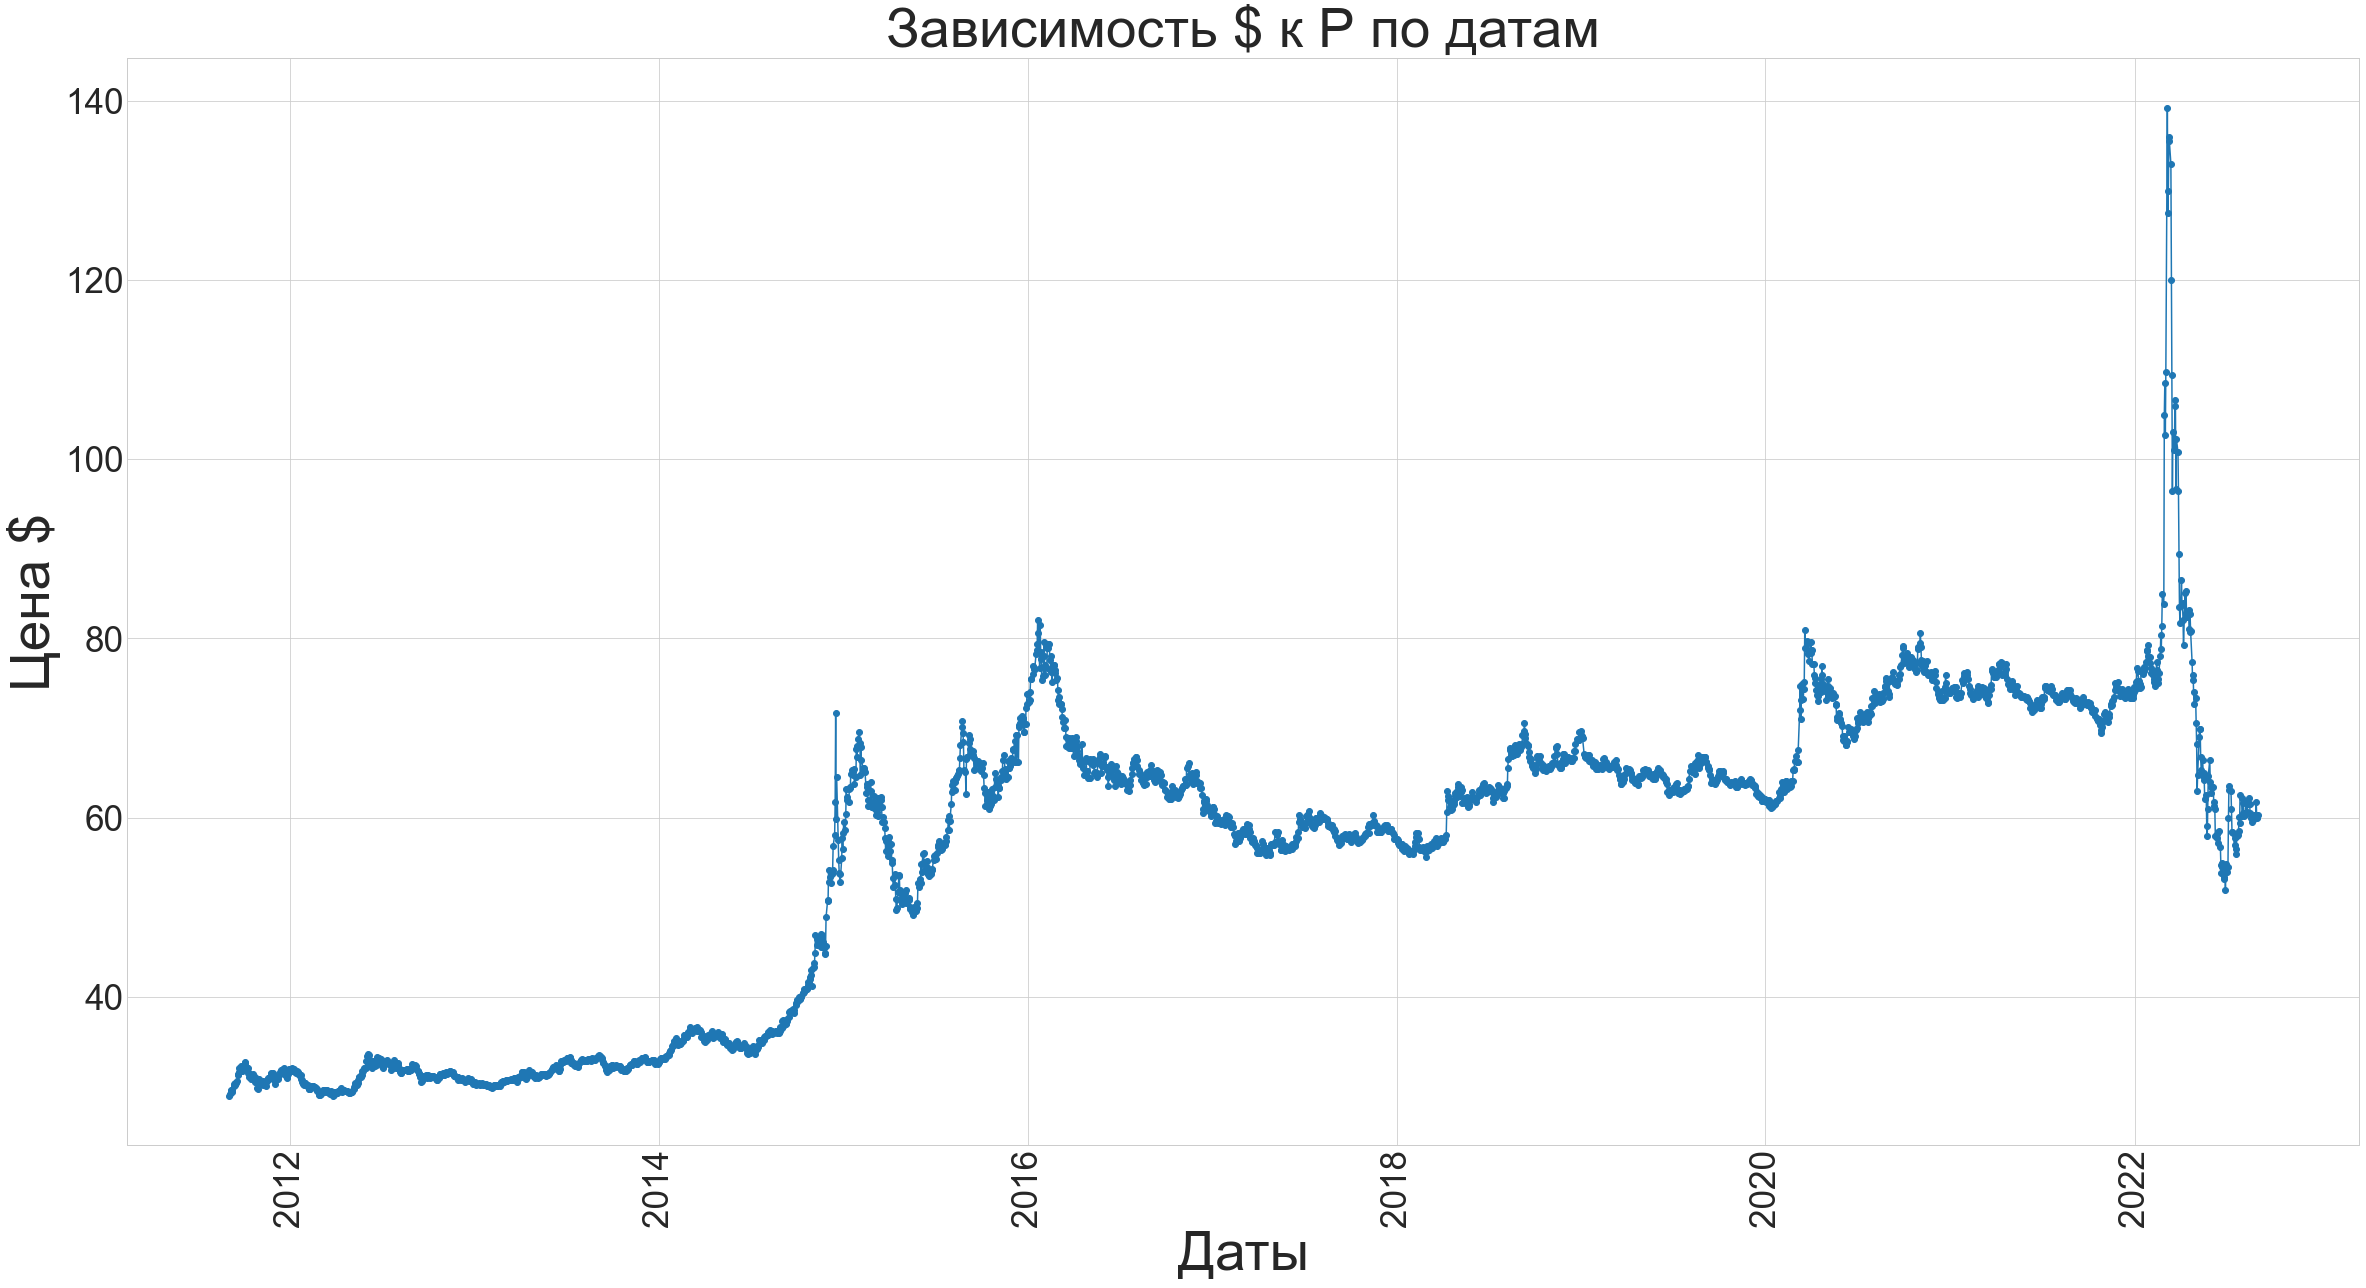

In [12]:
y = data['Open']
x = data['Date']
plt.figure(figsize=(40, 20))
plt.title('Зависимость $ к Р по датам', size = 55)
plt.ylabel('Цена $', size = 55)
plt.xlabel('Даты', size = 55)
plt.xticks(rotation=90)
plt.tick_params(labelsize=35)
plt.plot(x, y, marker='o')

In [13]:
max_value = data['Open'].max()
min_value = data['Open'].min()

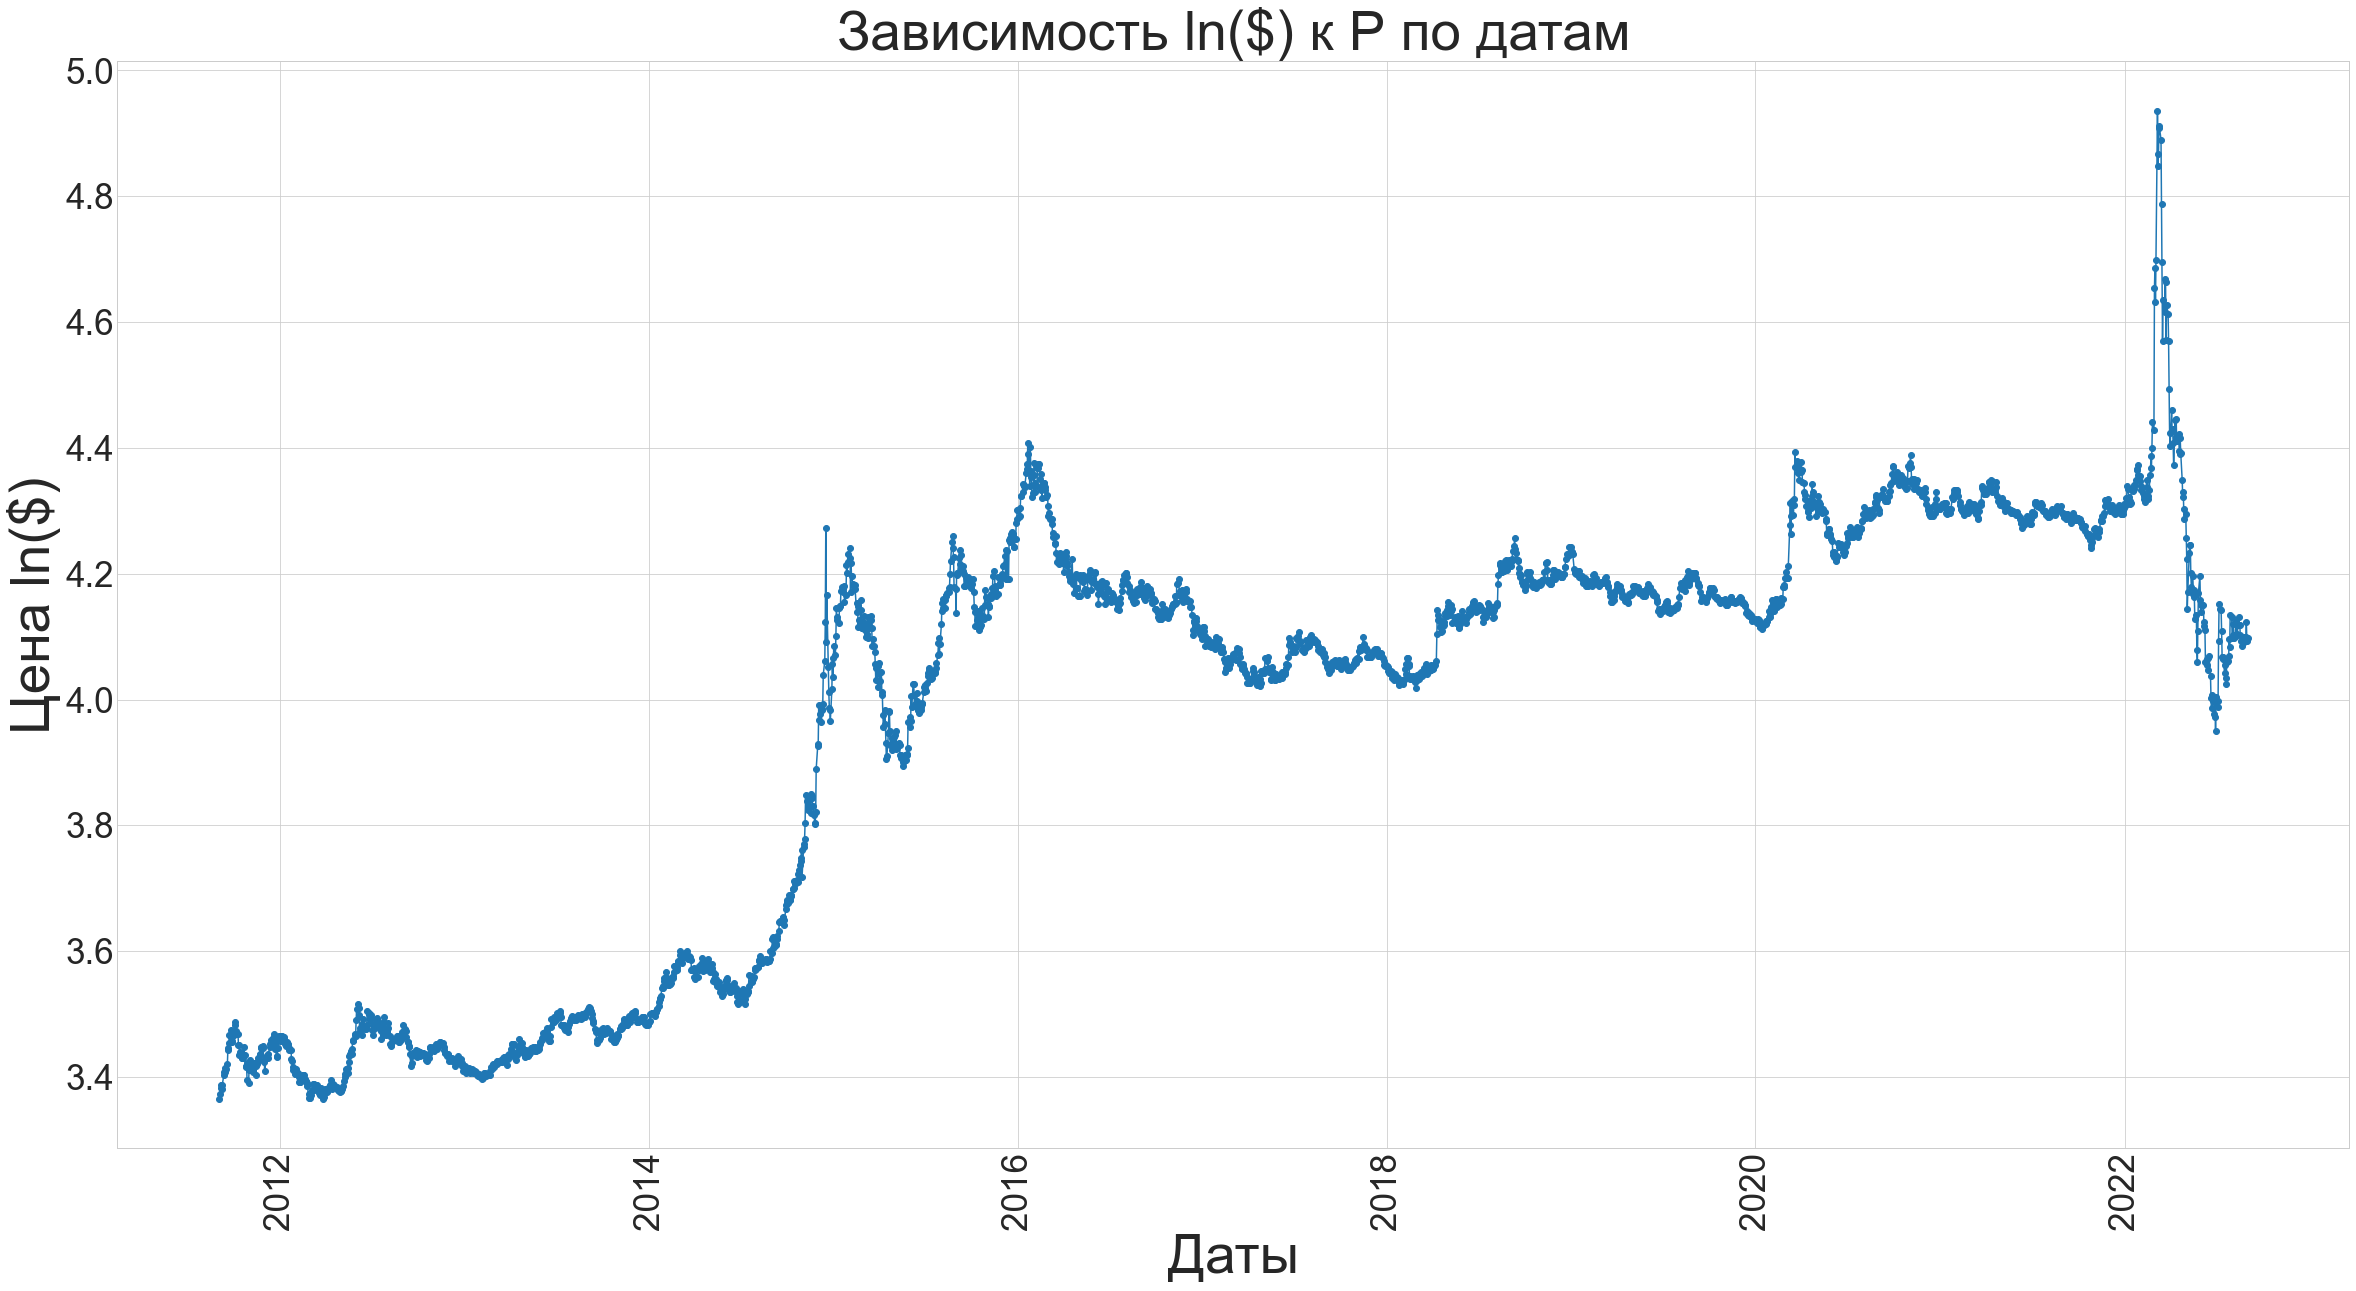

In [14]:
y = [log(x) for x in data['Open']]
x = data['Date']
plt.figure(figsize=(40, 20))
plt.title('Зависимость ln($) к Р по датам', size = 55)
plt.ylabel('Цена ln($)', size = 55)
plt.xlabel('Даты', size = 55)
plt.xticks(rotation=90)
plt.tick_params(labelsize=35)
plt.plot(x, y, marker = 'o')

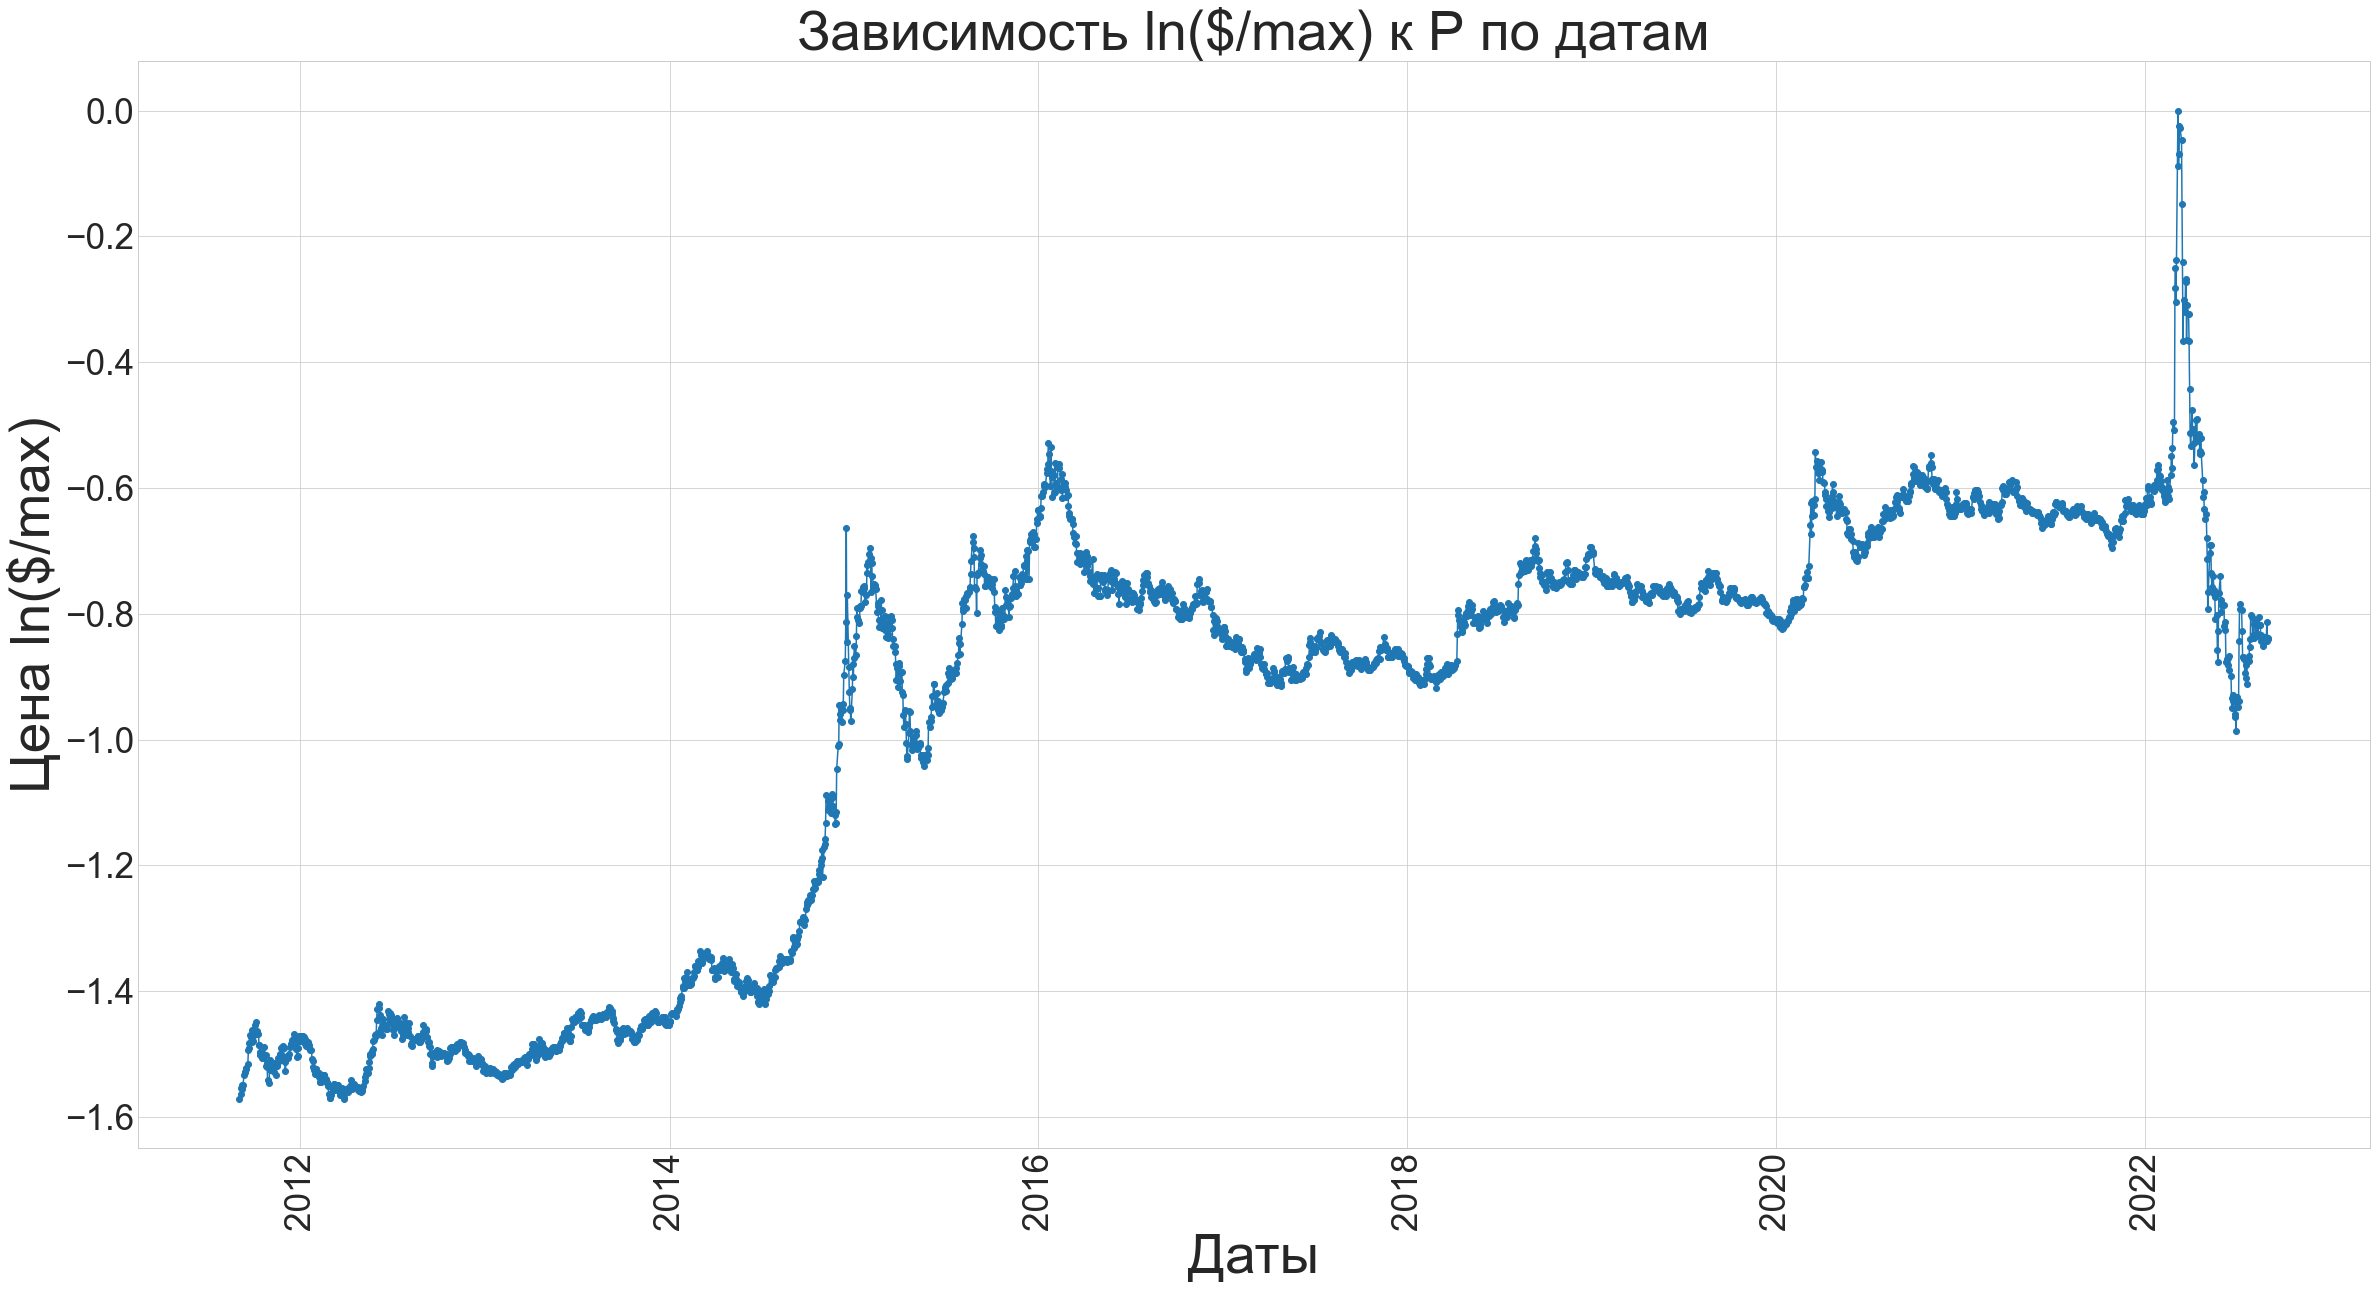

In [15]:
y = [log(x/max_value) for x in data['Open']]
x = data['Date']
plt.figure(figsize=(40, 20))
plt.title('Зависимость ln($/max) к Р по датам', size = 55)
plt.ylabel('Цена ln($/max)', size = 55)
plt.xlabel('Даты', size = 55)
plt.xticks(rotation=90)
plt.tick_params(labelsize=35)
plt.plot(x, y, marker = 'o')

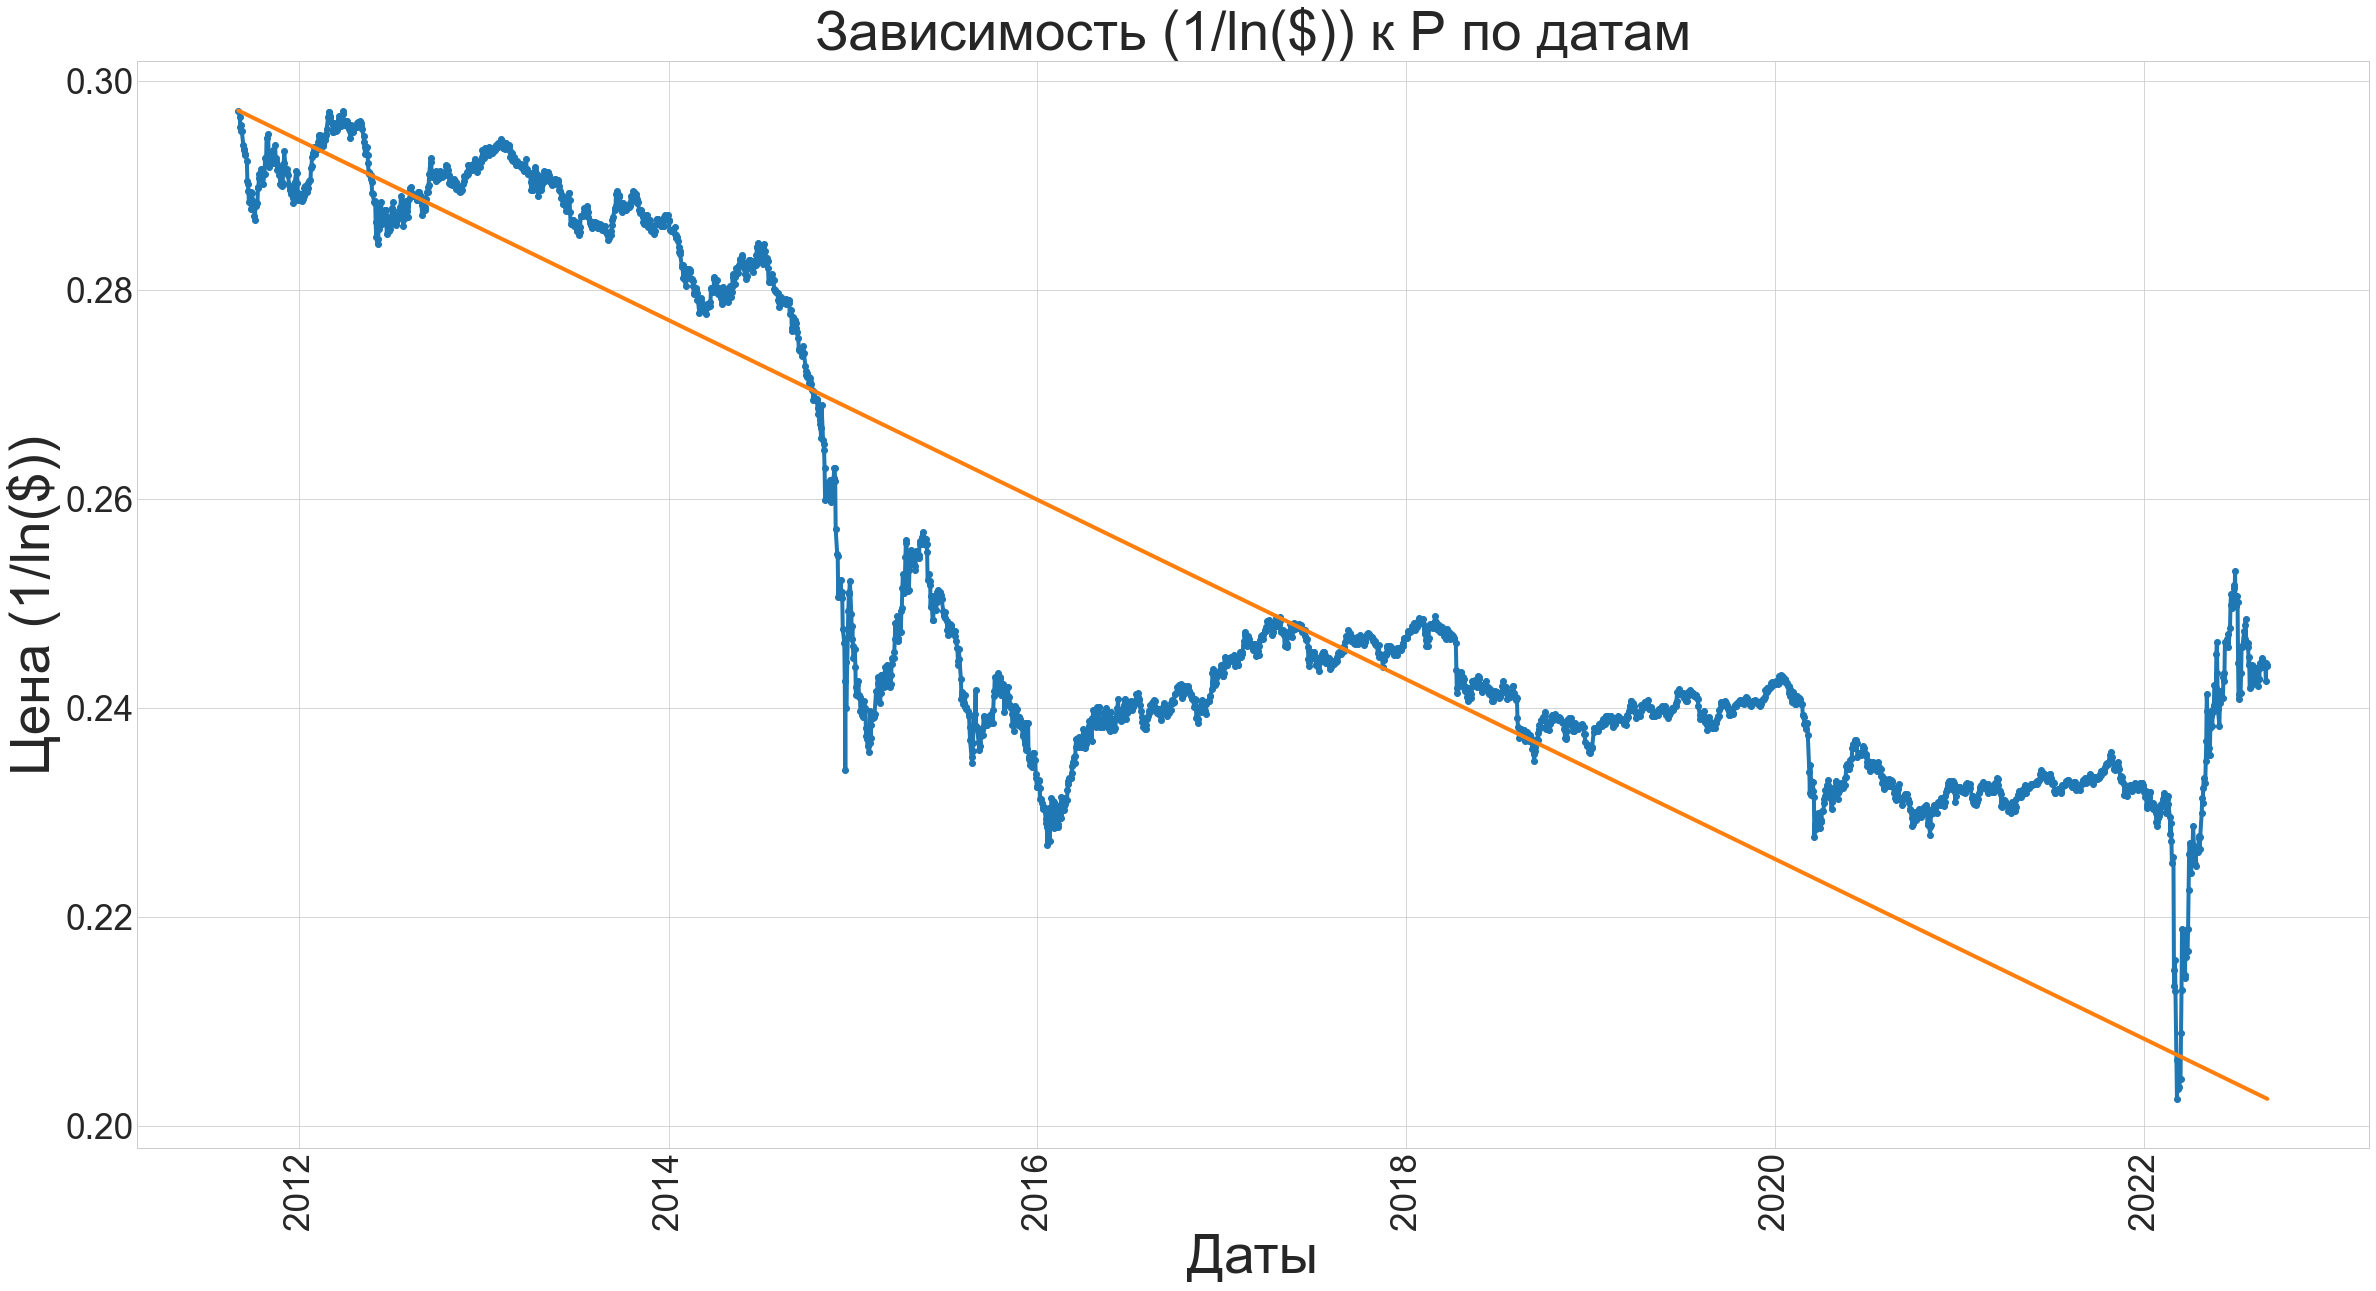

In [16]:
y = [(1/log(x)) for x in data['Open']]
x = data['Date']
mini = min(y)
maxi = max(y)
plt.figure(figsize=(40, 20))
plt.title('Зависимость (1/ln($)) к Р по датам', size = 55)
plt.ylabel('Цена (1/ln($))', size = 55)
plt.xlabel('Даты', size = 55)
plt.xticks(rotation=90)
plt.tick_params(labelsize=35)
plt.plot(x, y, marker = "o", linewidth = 4)
plt.plot([data['Date'][0], data['Date'][2870]],[maxi, mini], linewidth = 4)

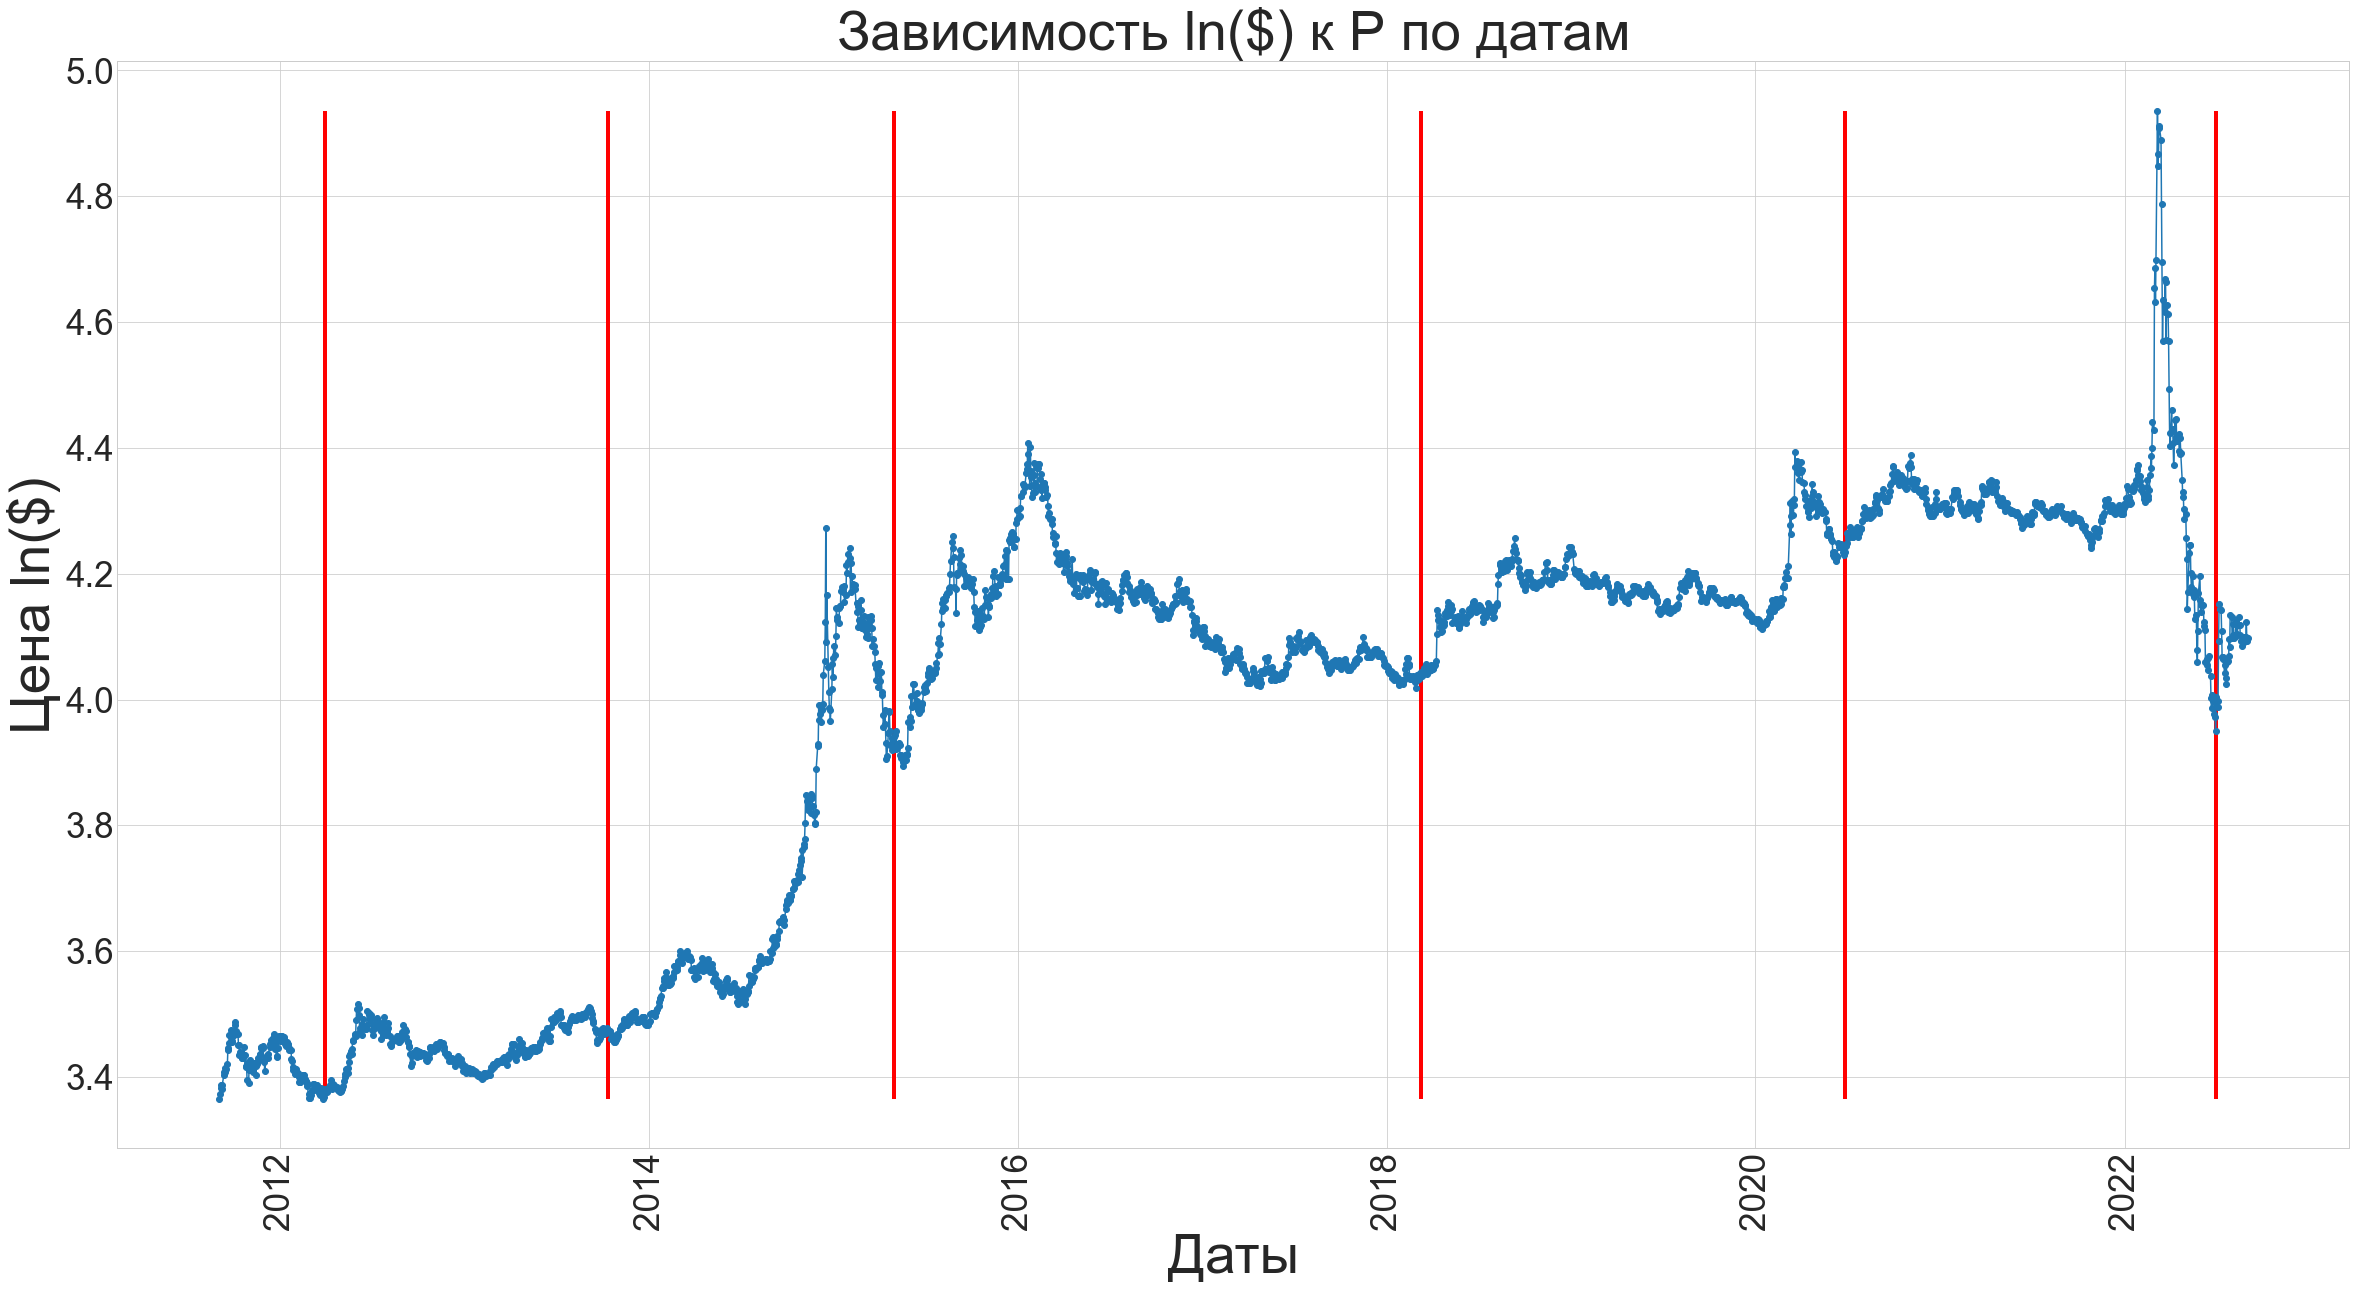

In [17]:
y = [log(x) for x in data['Open']]
x = data['Date']
mini = min(y)
maxi = max(y)
plt.figure(figsize=(40, 20))
plt.title('Зависимость ln($) к Р по датам', size = 55)
plt.ylabel('Цена ln($)', size = 55)
plt.xlabel('Даты', size = 55)
plt.xticks(rotation=90)
plt.tick_params(labelsize=35)
plt.vlines(data['Date'][150], mini, maxi, color = "r", linewidth = 4)
plt.vlines(data['Date'][550], mini, maxi, color = "r", linewidth = 4)
plt.vlines(data['Date'][955], mini, maxi, color = "r", linewidth = 4)
# plt.vlines(data['Date'][1450], mini, maxi, color = "r", linewidth = 4)
plt.vlines(data['Date'][1700], mini, maxi, color = "r", linewidth = 4)
plt.vlines(data['Date'][2300], mini, maxi, color = "r", linewidth = 4)
# plt.vlines(data['Date'][2590], mini, maxi, color = "r", linewidth = 4)
plt.vlines(data['Date'][2825], mini, maxi, color = "r", linewidth = 4)
plt.minorticks_on()
plt.plot(x, y, marker = 'o')

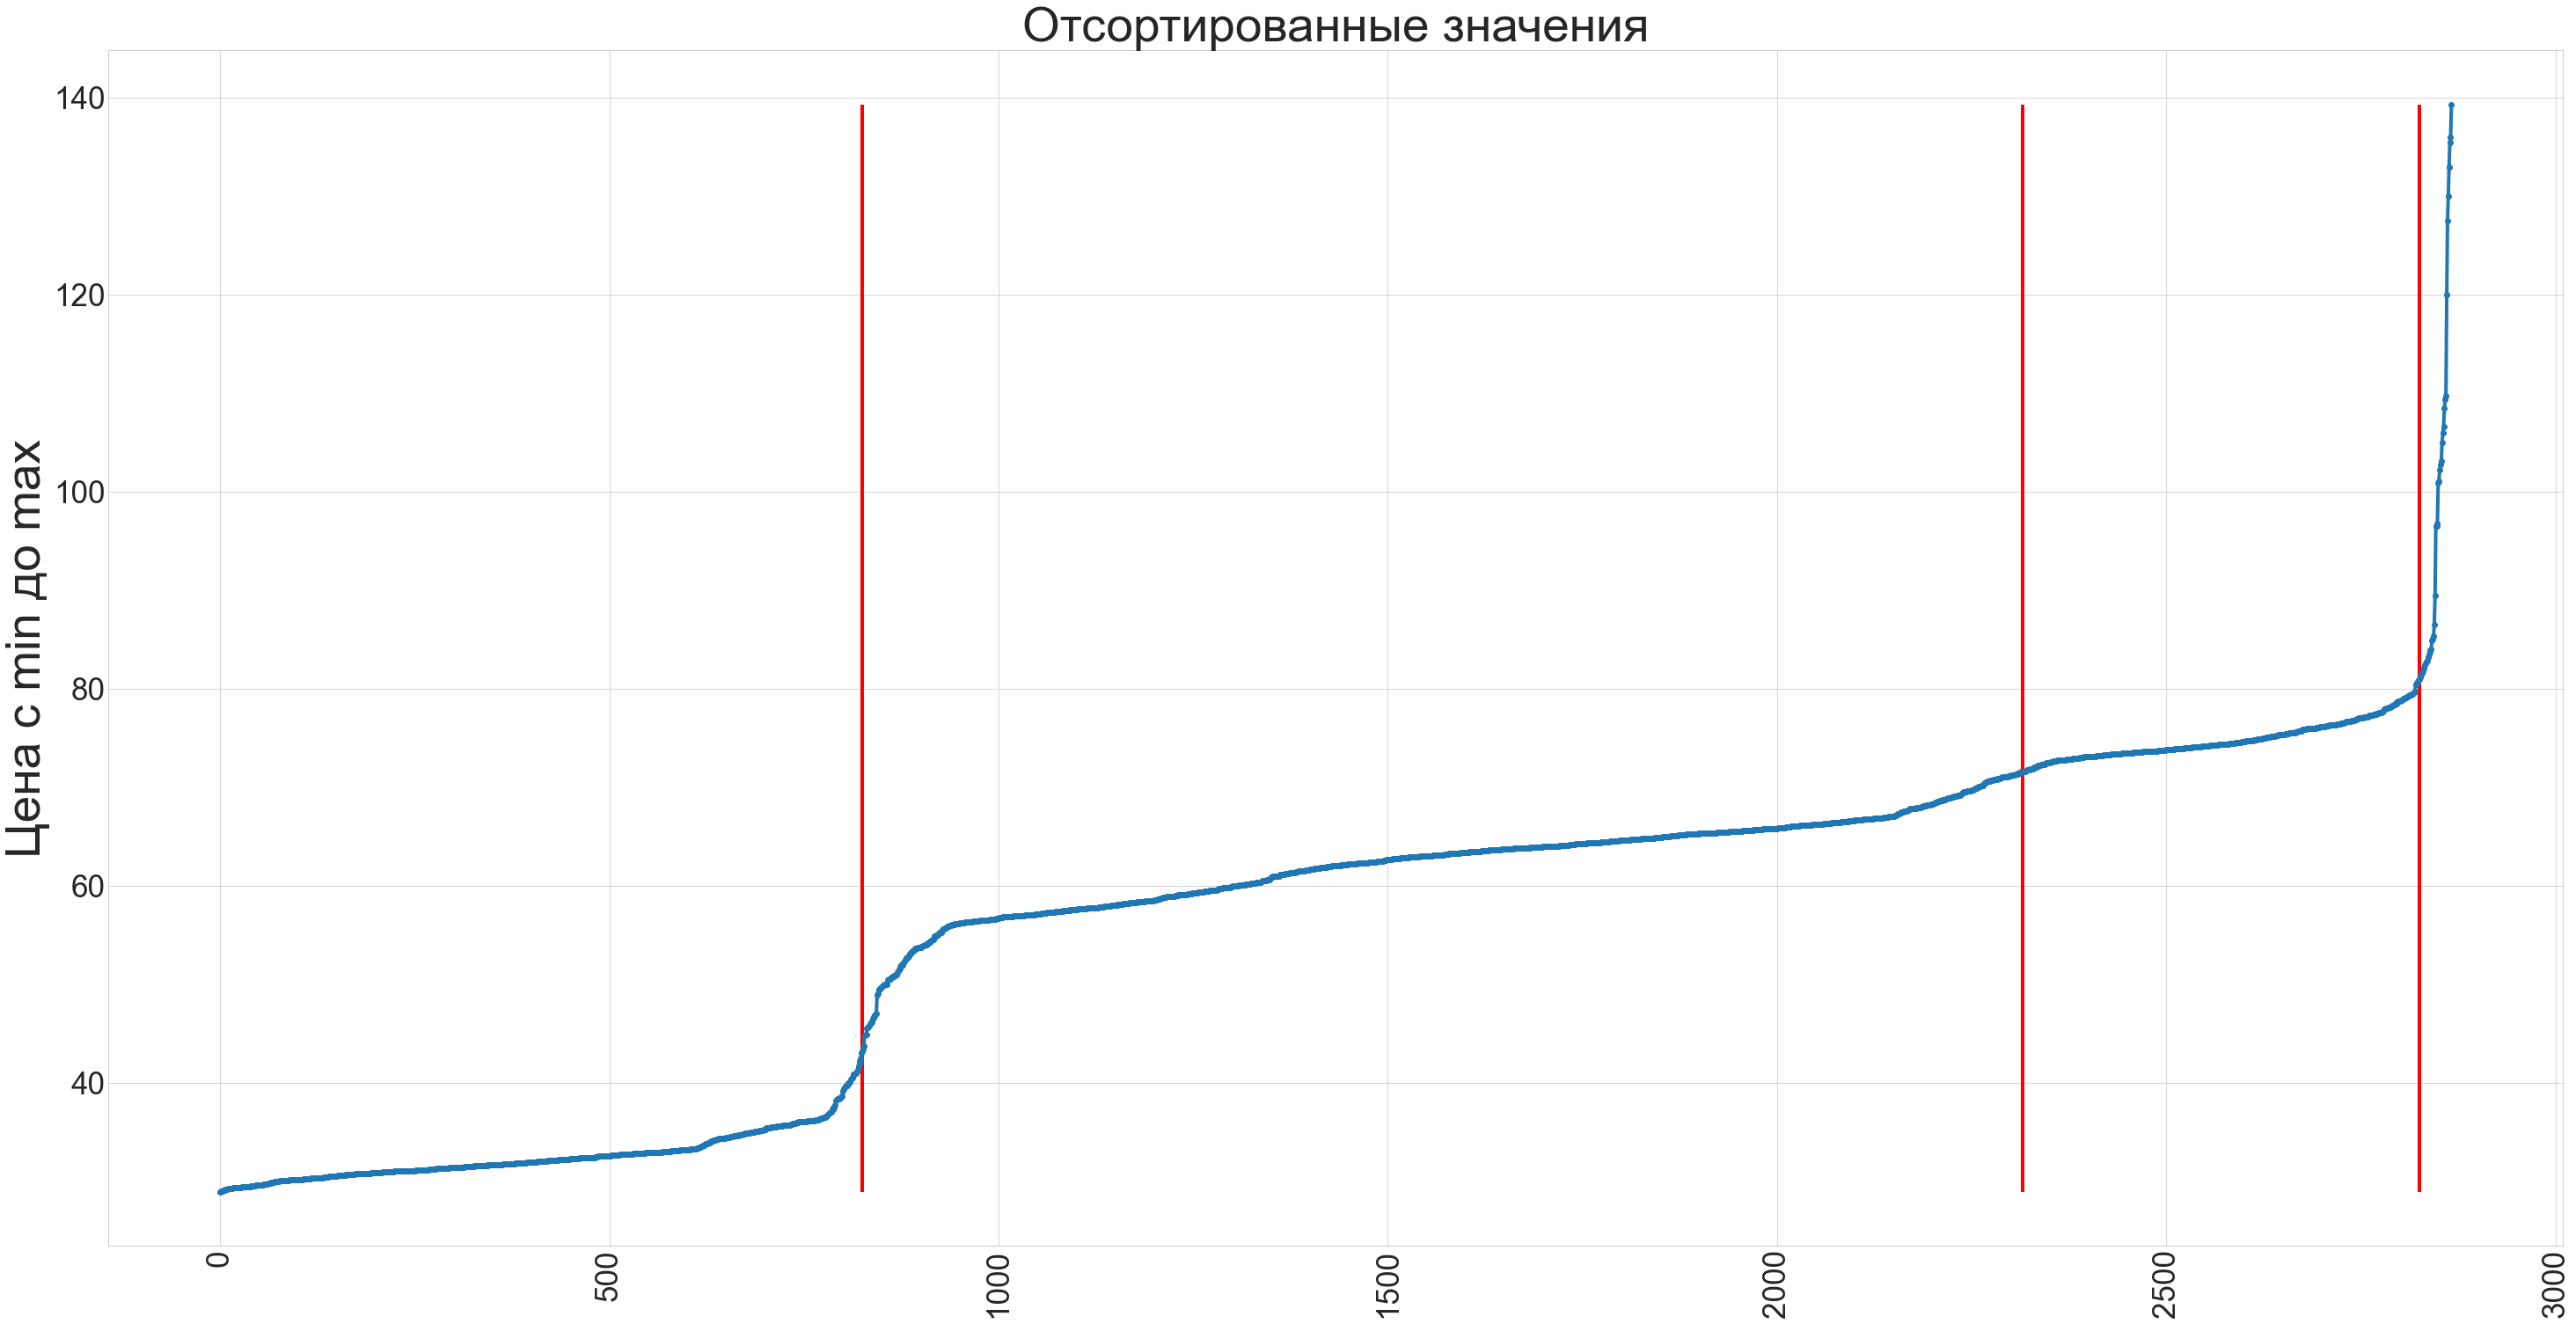

In [18]:
data.sort_values(by=["Open"], inplace=True)
x = [*range(len(data))]
y = data["Open"]
plt.figure(figsize=(50, 25))
plt.title('Отсортированные значения', size = 55)
plt.ylabel('Цена с min до max', size = 55)
plt.xticks(rotation=90)
plt.tick_params(labelsize=35)
plt.vlines(825, y.min(), y.max(), color = "r", linewidth = 4)
plt.vlines(2315, y.min(), y.max(), color = "r", linewidth = 4)
plt.vlines(2825, y.min(), y.max(), color = "r", linewidth = 4)
plt.minorticks_on()
plt.plot(x, y, linewidth = 4, marker = 'o')

In [19]:
data["Open"]

0        28.937201
147      28.949200
127      28.994200
128      28.998199
148      29.031200
           ...    
2741    139.253998
547            NaN
1527           NaN
1619           NaN
2013           NaN
Name: Open, Length: 2871, dtype: float64

In [20]:
from collections import Counter

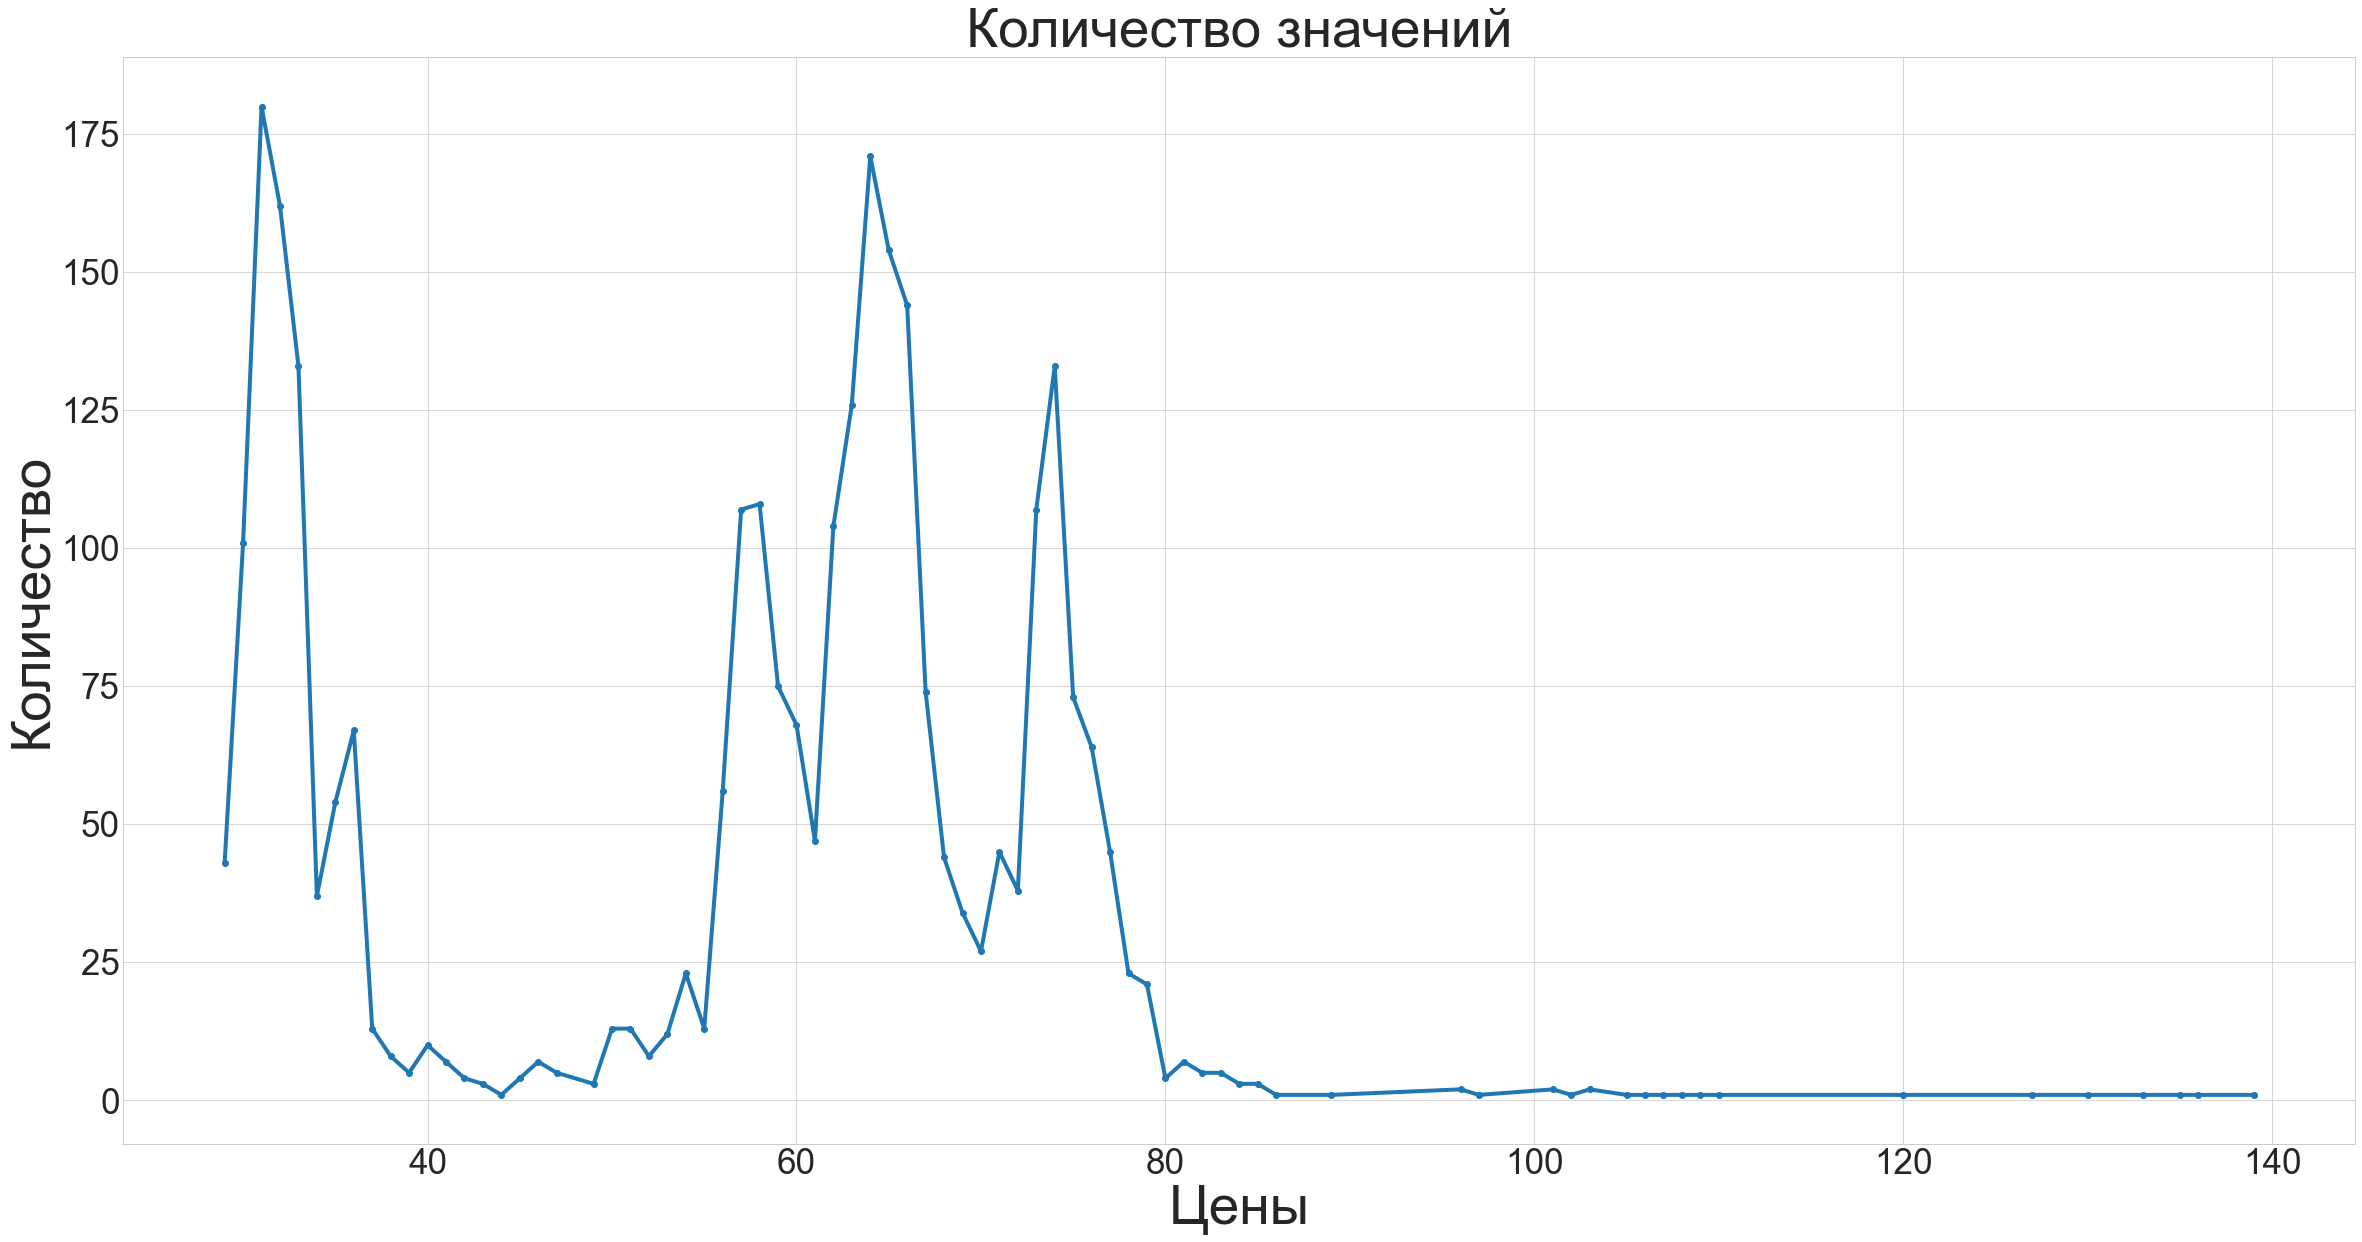

In [21]:
counts = Counter(np.around(data["Open"]))
x_1 = []
y_1 = []
for item, count in counts.items():
    x_1.append(count)
    y_1.append(item)
y = x_1
x = y_1
plt.figure(figsize=(40, 20))
plt.title('Количество значений', size = 55)
plt.xlabel('Цены', size = 55)
plt.ylabel('Количество', size = 55)
plt.tick_params(labelsize=35)
plt.plot(x, y, marker = 'o', linewidth = 4)

<BarContainer object of 2871 artists>

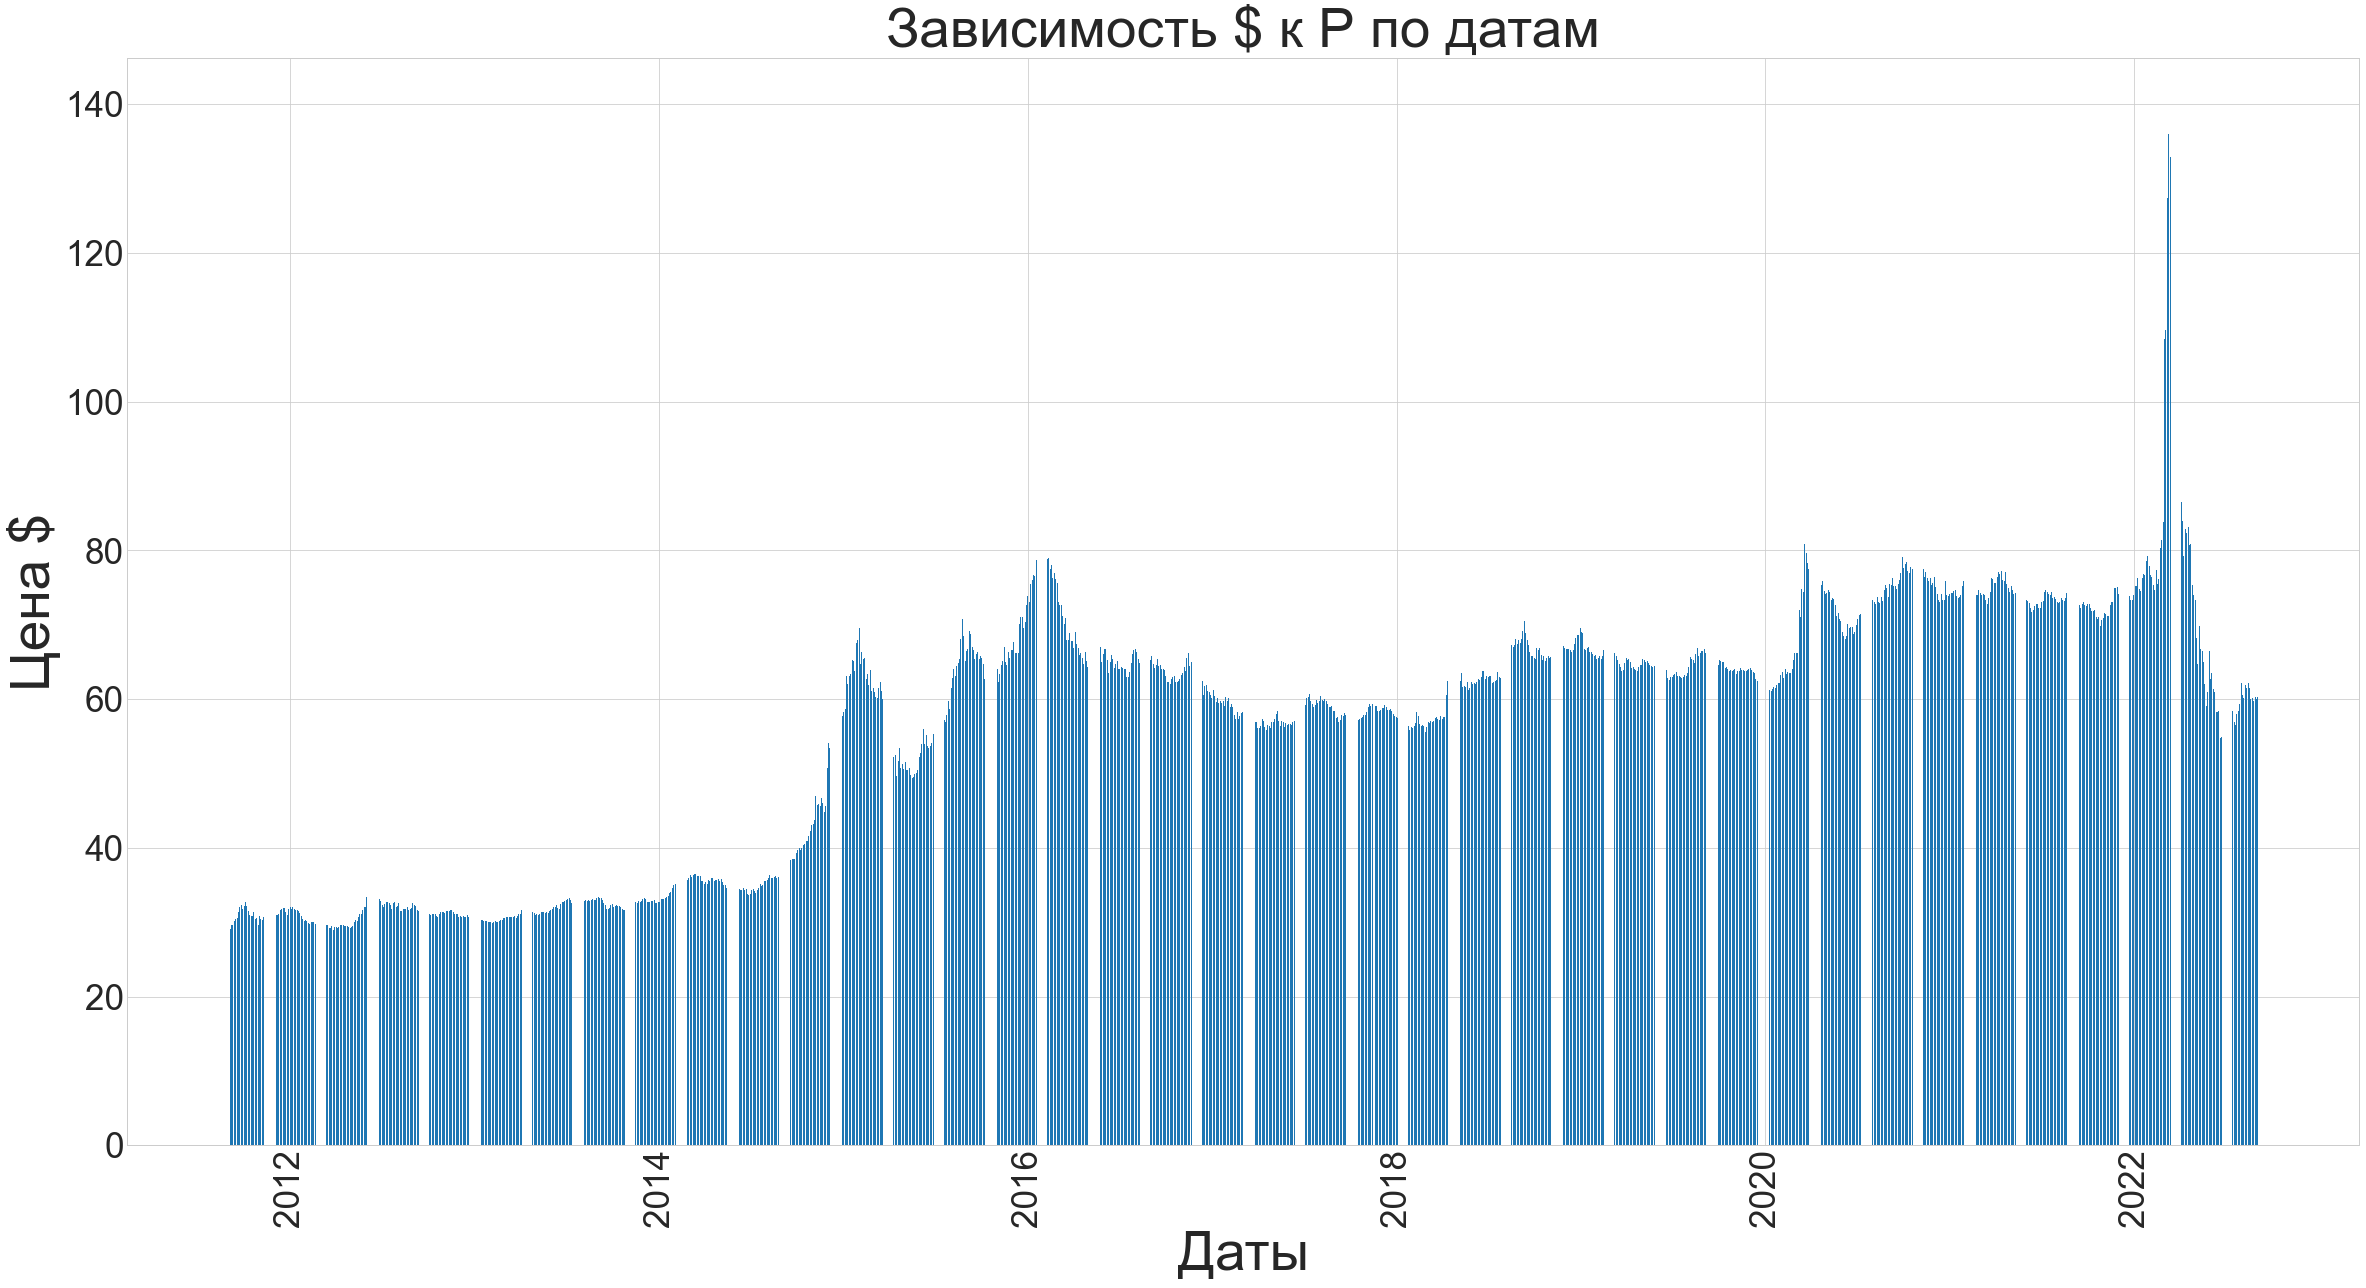

In [22]:

y = data['Open']
x = data['Date']
plt.figure(figsize=(40, 20))
plt.title('Зависимость $ к Р по датам', size = 55)
plt.ylabel('Цена $', size = 55)
plt.xlabel('Даты', size = 55)
plt.xticks(rotation=90)
plt.tick_params(labelsize=35)
plt.bar(x, y)

In [25]:
import math
def normal_distribution(values, mu, sigma, mult=1):
    return [1 / (sigma * (2 * math.pi) ** 0.5)
            * math.e ** (-0.5 * ((x - mu) / sigma) ** 2) * mult
            for x in values]
def ln_normal_distribution(values, mu, sigma):
    x_minus_mu_power_2 = [(x - mu) ** 2 for x in values]
    y = [-log(sigma * (2 * math.pi) ** 0.5) - x / (2 * sigma ** 2)
         for x in x_minus_mu_power_2]
    return (x_minus_mu_power_2, y)

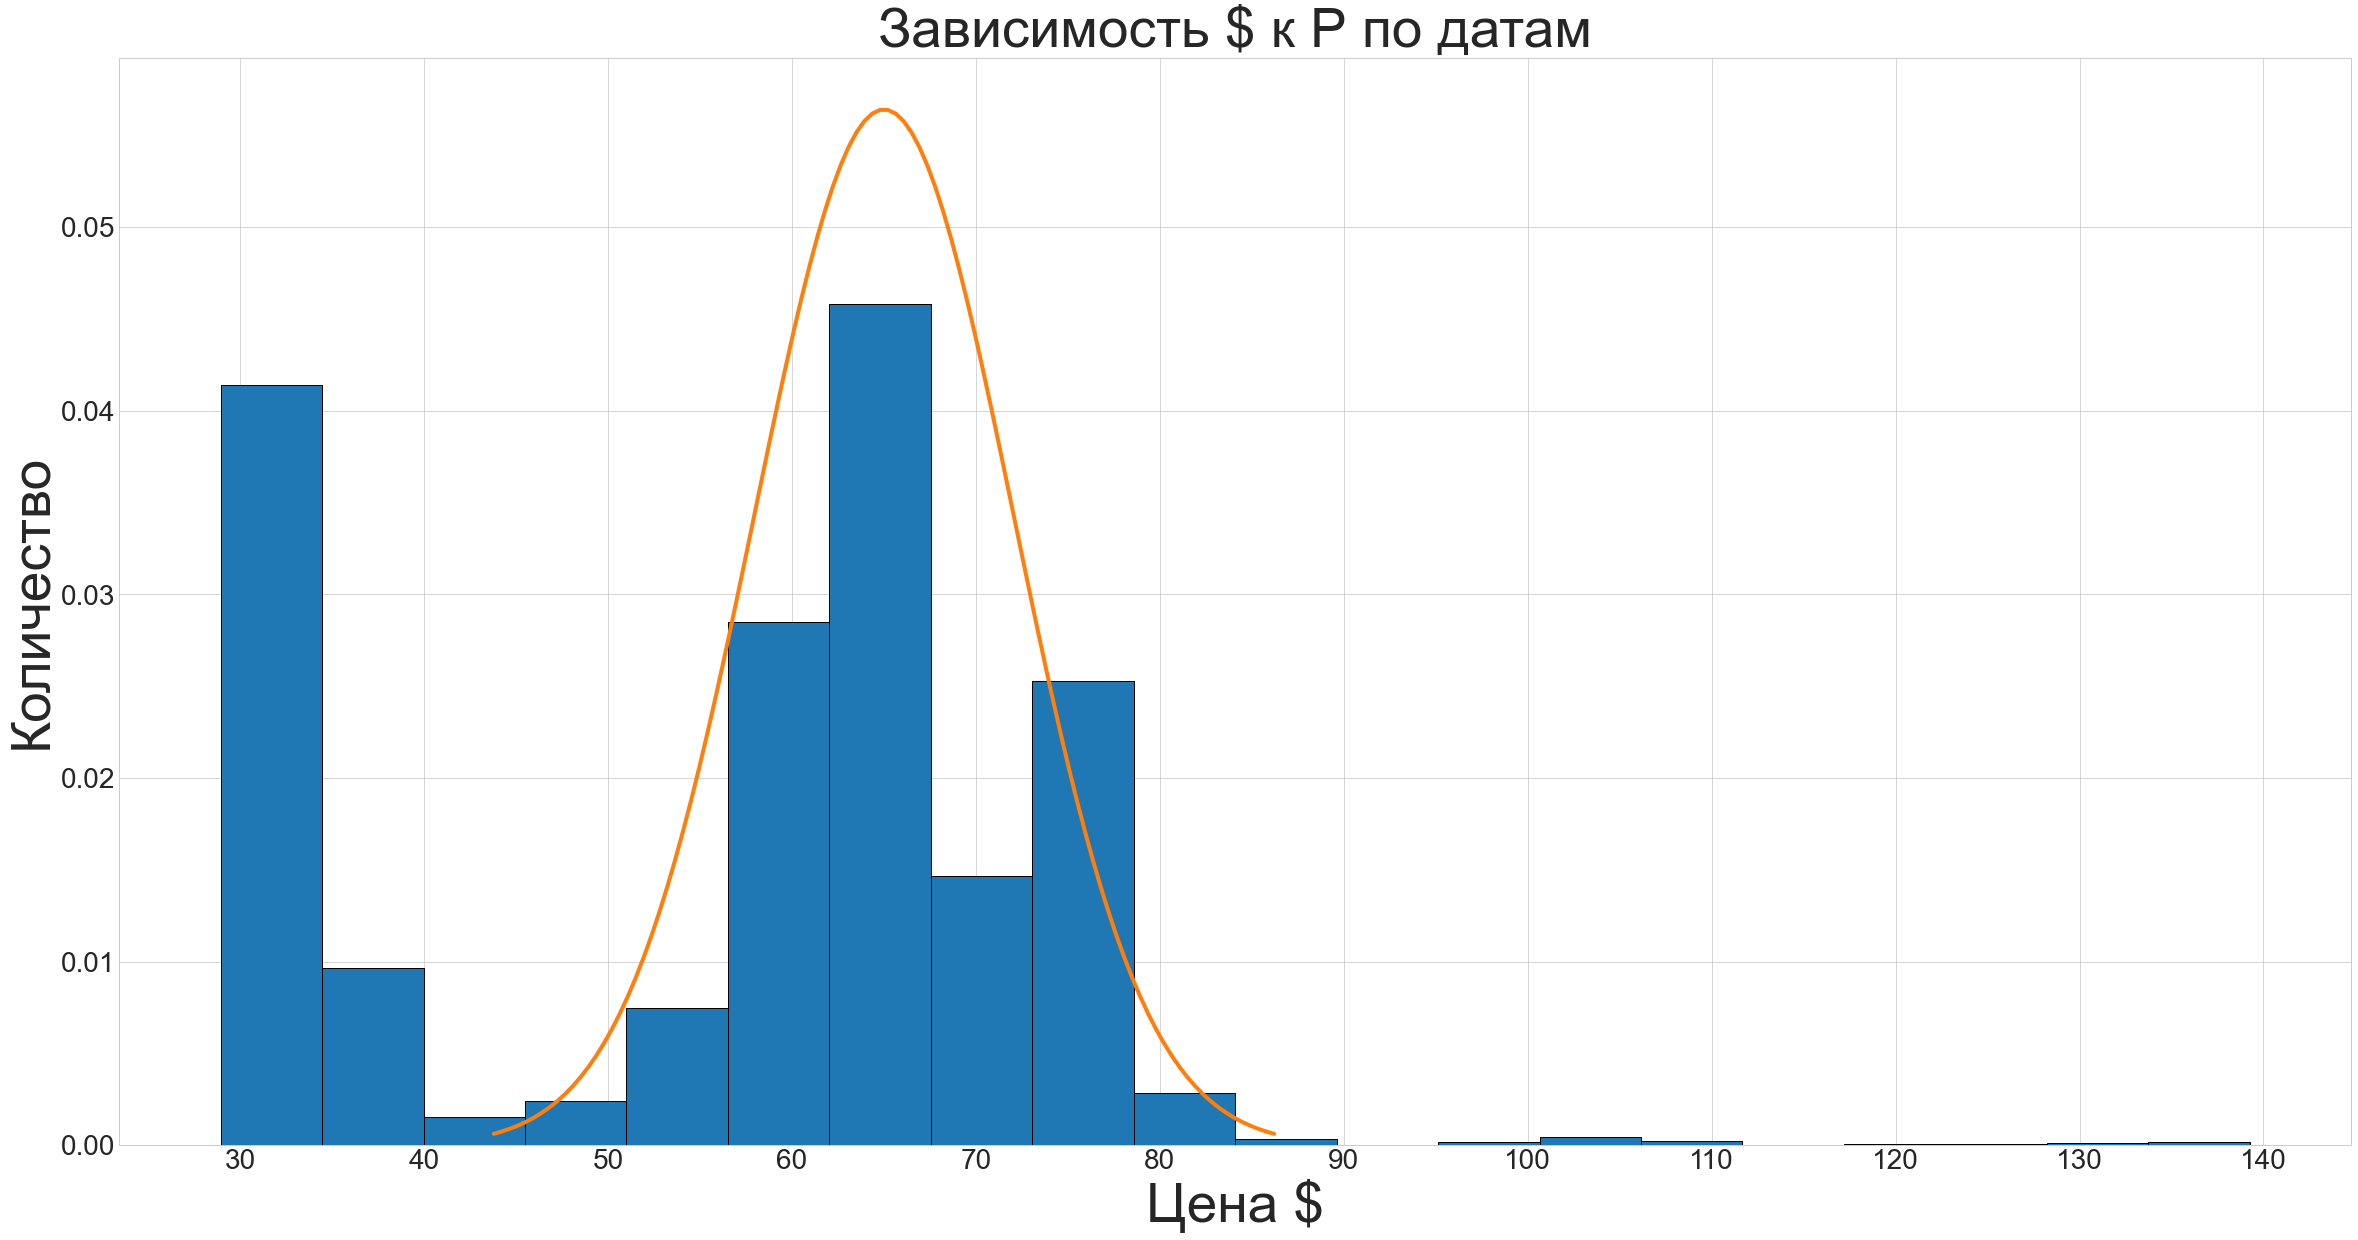

In [57]:
import scipy.stats as stats
import math



plt.figure(figsize=(40, 20))

plt.title('Зависимость $ к Р по датам', size = 55)
plt.ylabel('Количество', size = 55)
plt.xlabel('Цена $', size = 55)
plt.rcParams.update({'font.size': 28})

plt.hist(data['Open'], 20, edgecolor = (0, 0, 0),density=True, label="Data")
plt.xticks([10 * i for i in range(16)]);

mu = 65
variance = 50
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), linewidth = 4);
